In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# **EDA**

In [ ]:
from google.colab import files
uplodaed =files.upload()

Saving hotel_bookings - hotel_bookings.csv to hotel_bookings - hotel_bookings.csv


In [ ]:
df = pd.read_csv('hotel_bookings - hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


# Missing Data

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df['company']=df['company'].fillna(0)
df['agent']=df['agent'].fillna(0)
imputer =SimpleImputer(strategy ='most_frequent')
country = imputer.fit_transform(df['country'].values.reshape(-1, 1))
df['country'] =pd.DataFrame(country)
imputer_2 =SimpleImputer(strategy ='median')
df['children'] = imputer_2.fit_transform(df['children'].values.reshape(-1 ,1))


In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


<Axes: xlabel='is_canceled', ylabel='count'>

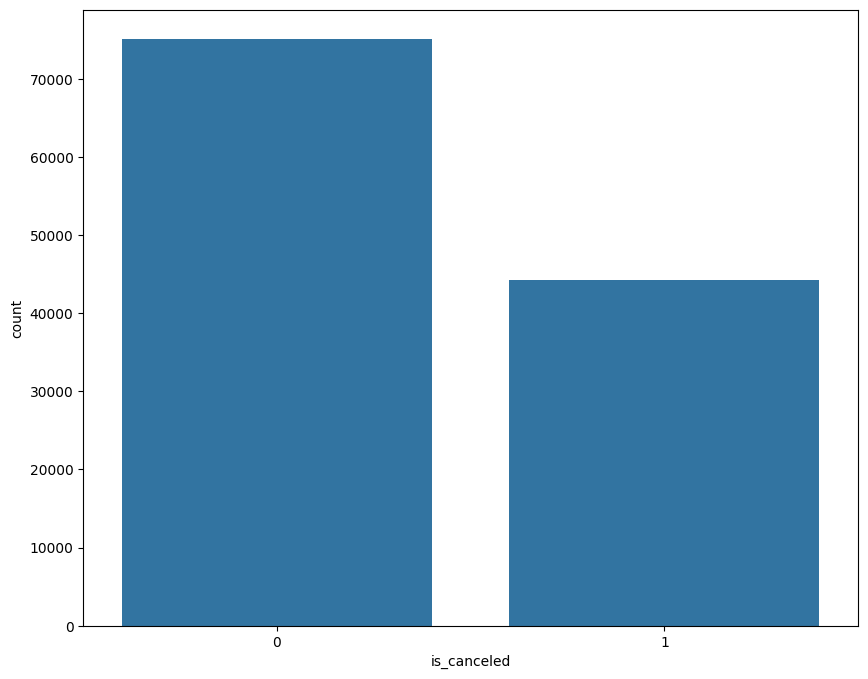

In [ ]:
plt.figure(figsize =(10 ,8))
sns.countplot(data =df ,x='is_canceled')


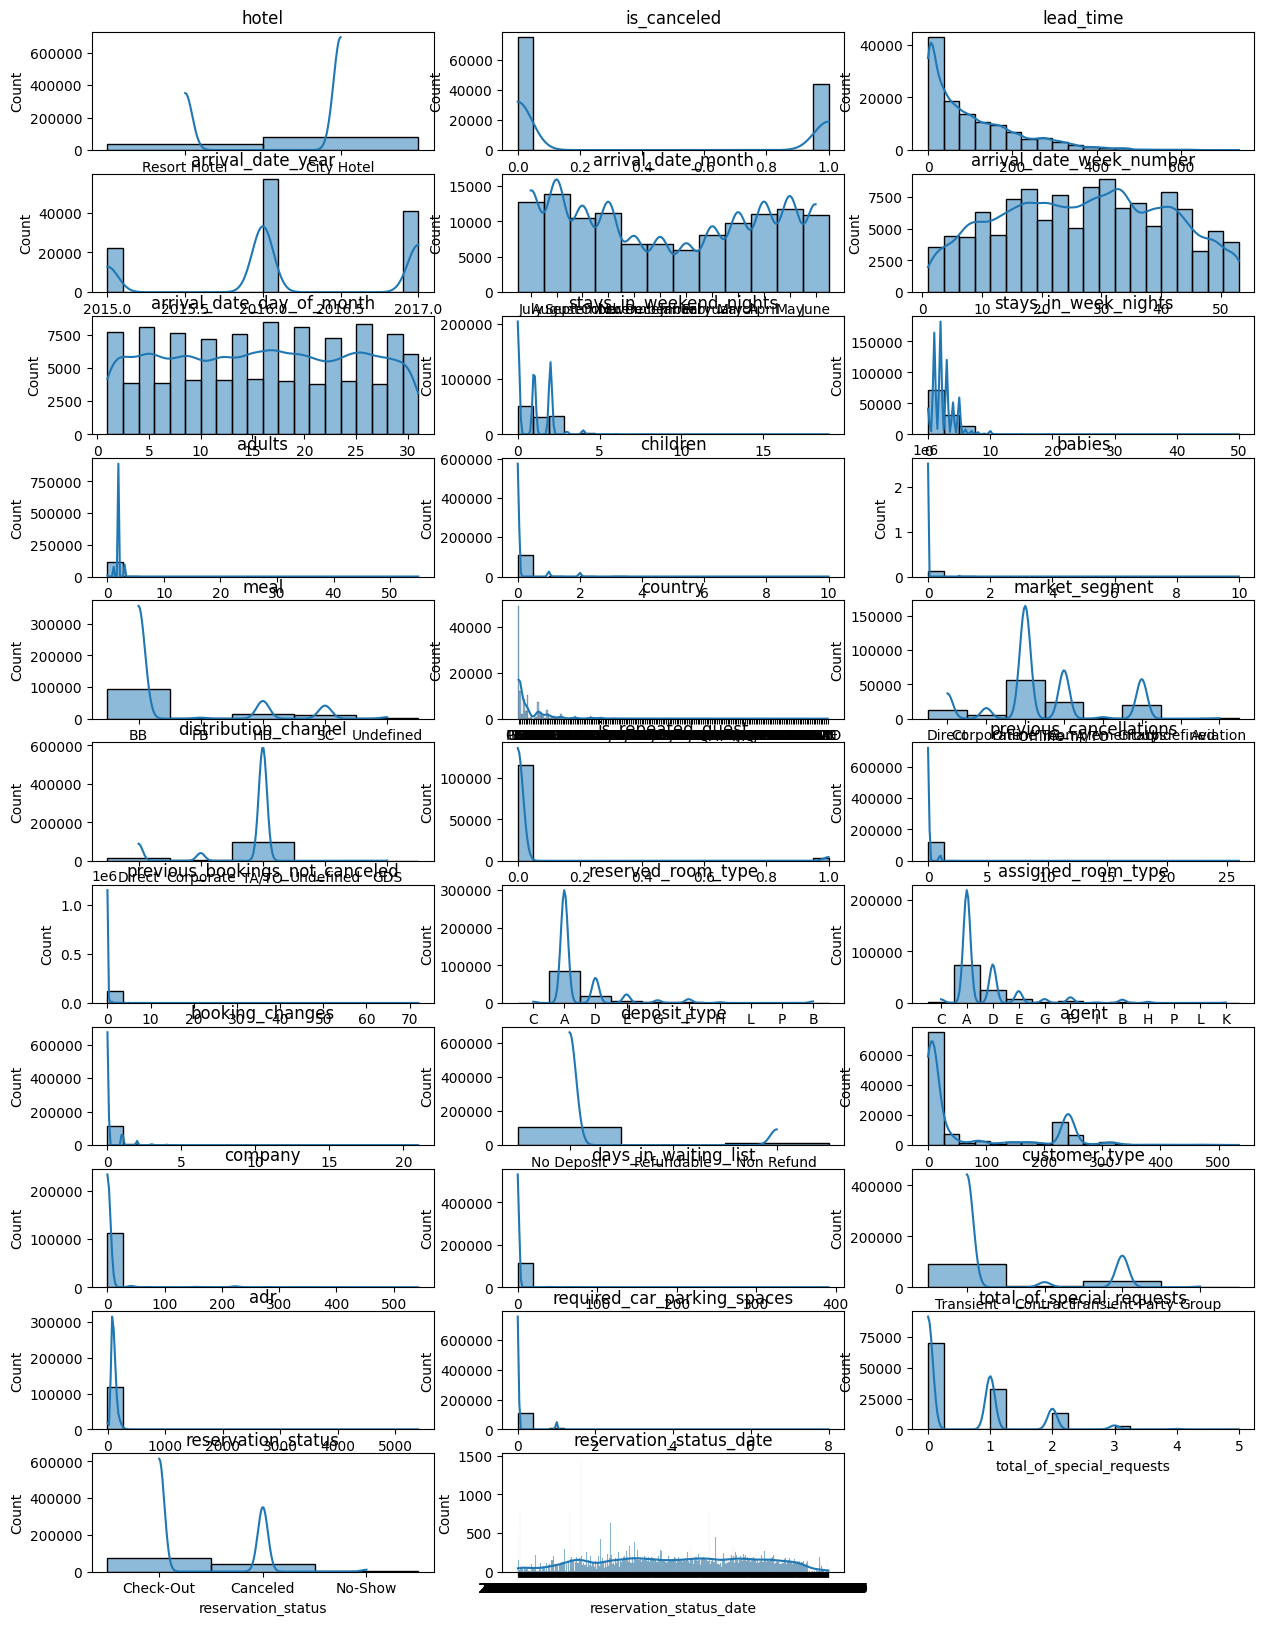

In [ ]:
plt.figure(figsize =(15 ,20))
for i ,col in enumerate(df.columns):
  plt.subplot(11 ,3 ,i+1)
  sns.histplot(df[col] ,bins =20 ,kde =True)
  plt.title(col)


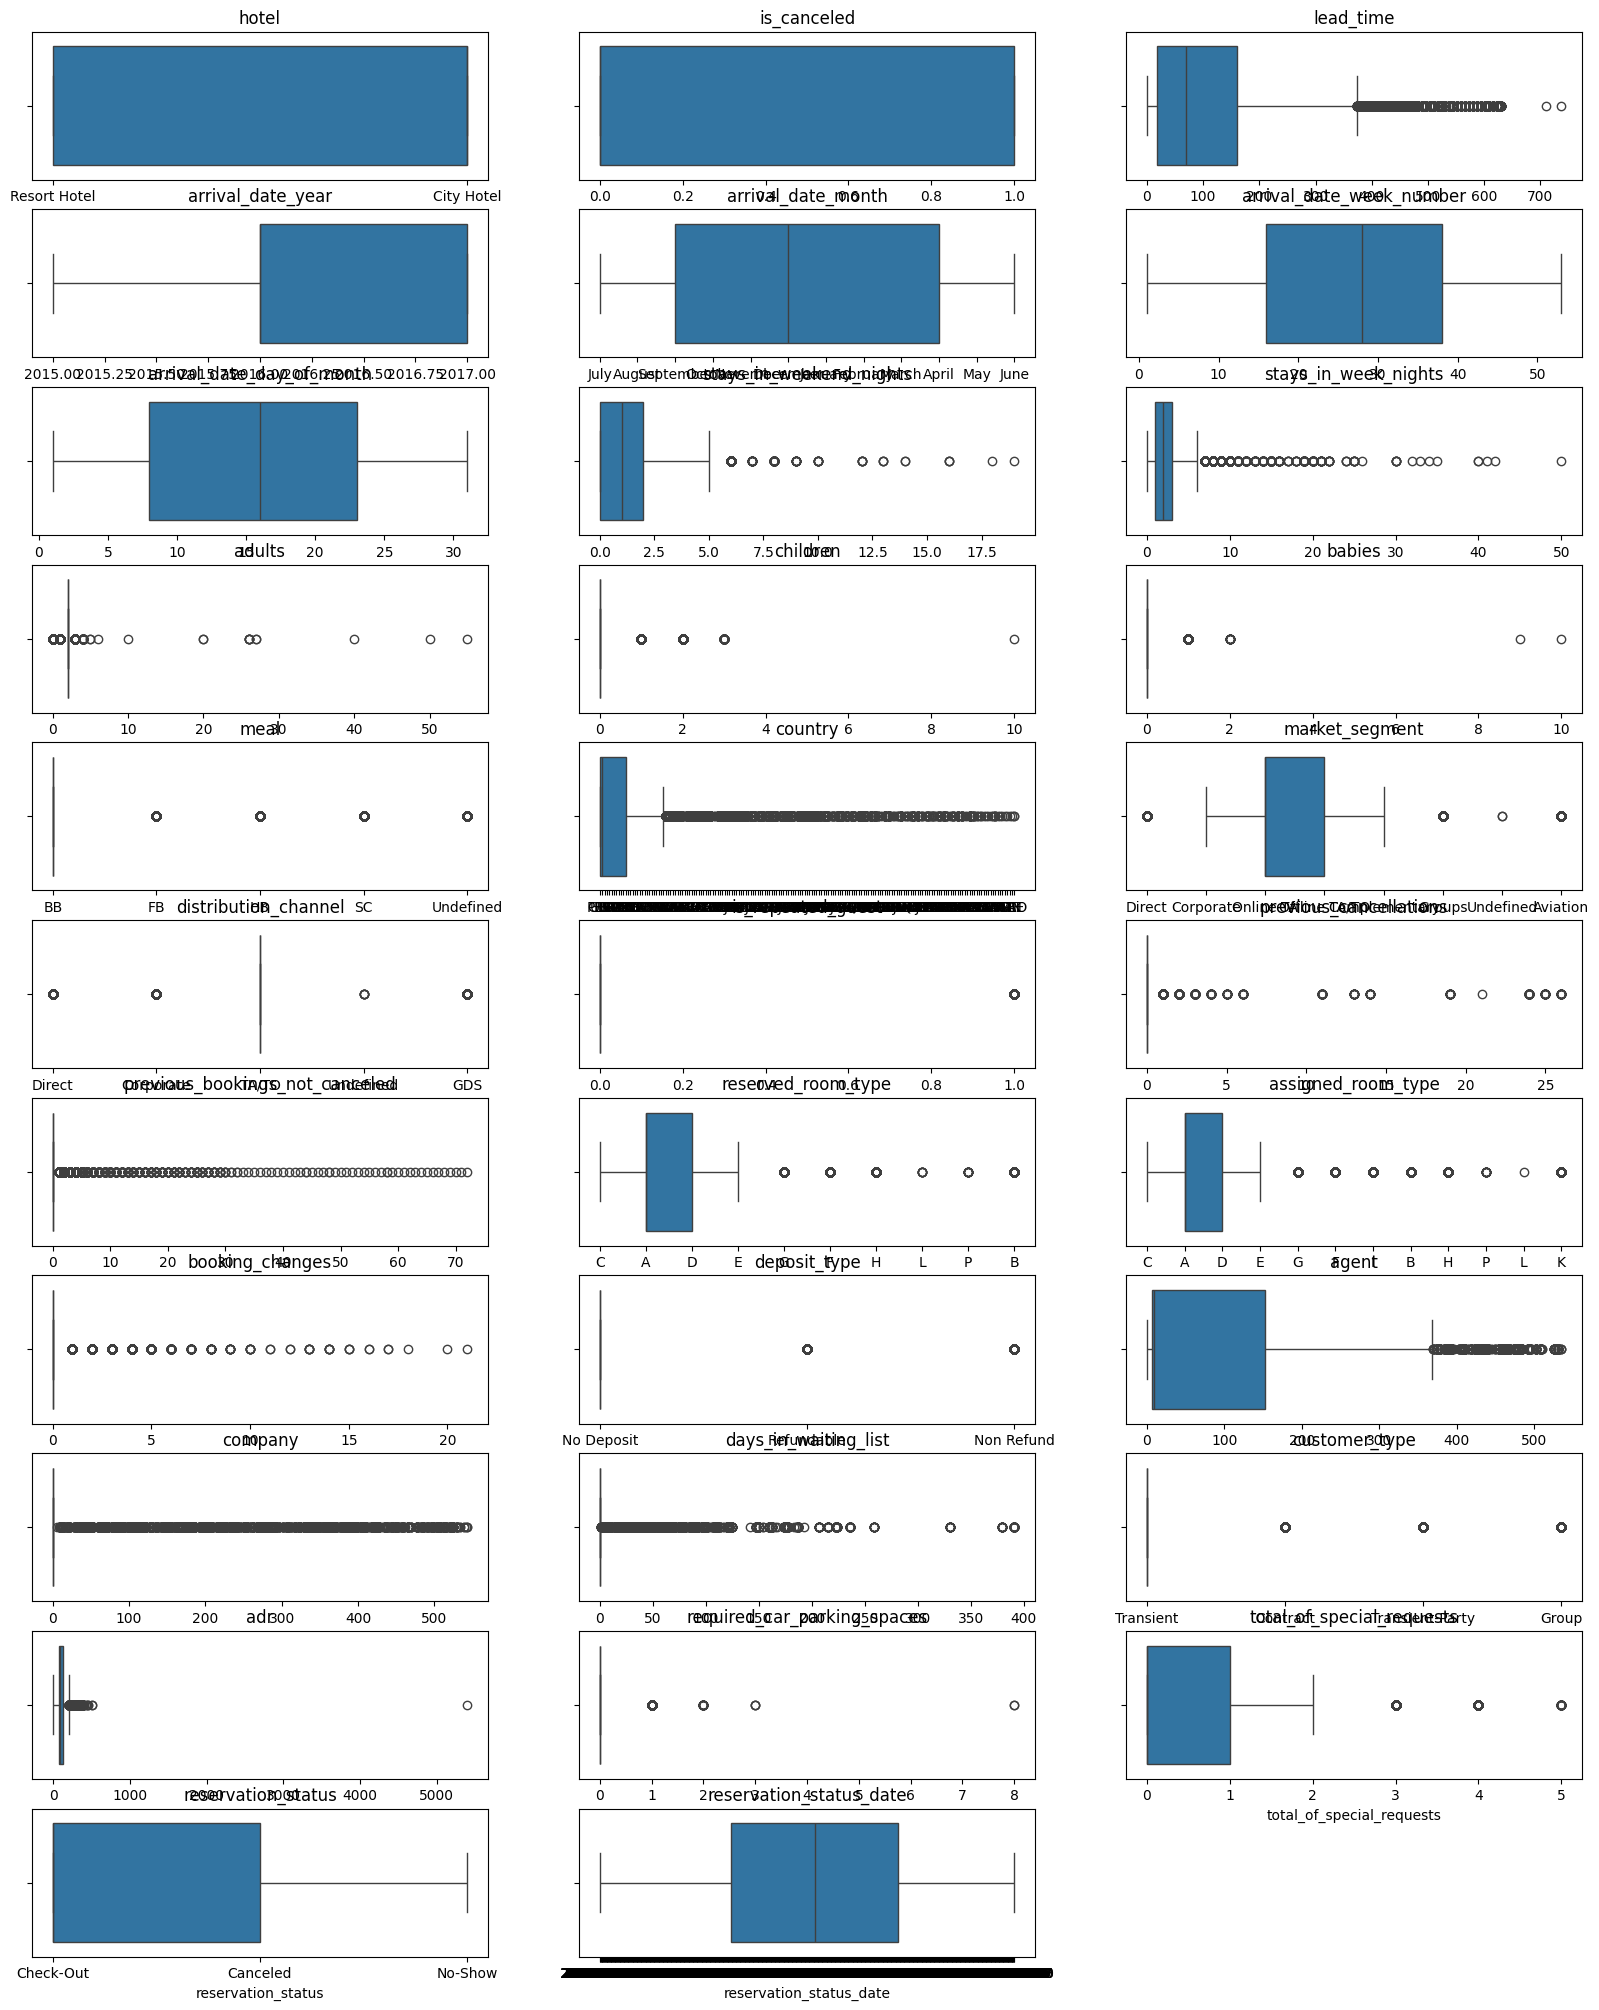

In [ ]:
plt.figure(figsize=(20 ,25))
for i ,col in enumerate(df.columns):
  plt.subplot(11 ,3 ,i+1)
  sns.boxplot(df[col] ,orient ='h')
  plt.title(col)

# Encoding

In [ ]:
encode =LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] =encode.fit_transform(df[col])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0.0,0.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,0.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,0.0,0,2,98.0,0,1,1,123


# Scaling

In [ ]:
scale =StandardScaler()
df =pd.DataFrame(scale.fit_transform(df),columns =scale.get_feature_names_out())
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.407224,-0.76704,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,0.703526,-1.739749
1,1.407224,-0.76704,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,0.703526,-1.739749
2,1.407224,-0.76704,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,0.703526,-1.735353
3,1.407224,-0.76704,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,-0.373175,2.138963,-0.199748,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,0.703526,-1.735353
4,1.407224,-0.76704,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,...,-0.373175,1.541622,-0.199748,-0.131924,-0.237979,-0.075810,-0.254873,0.540666,0.703526,-1.730957


<Axes: >

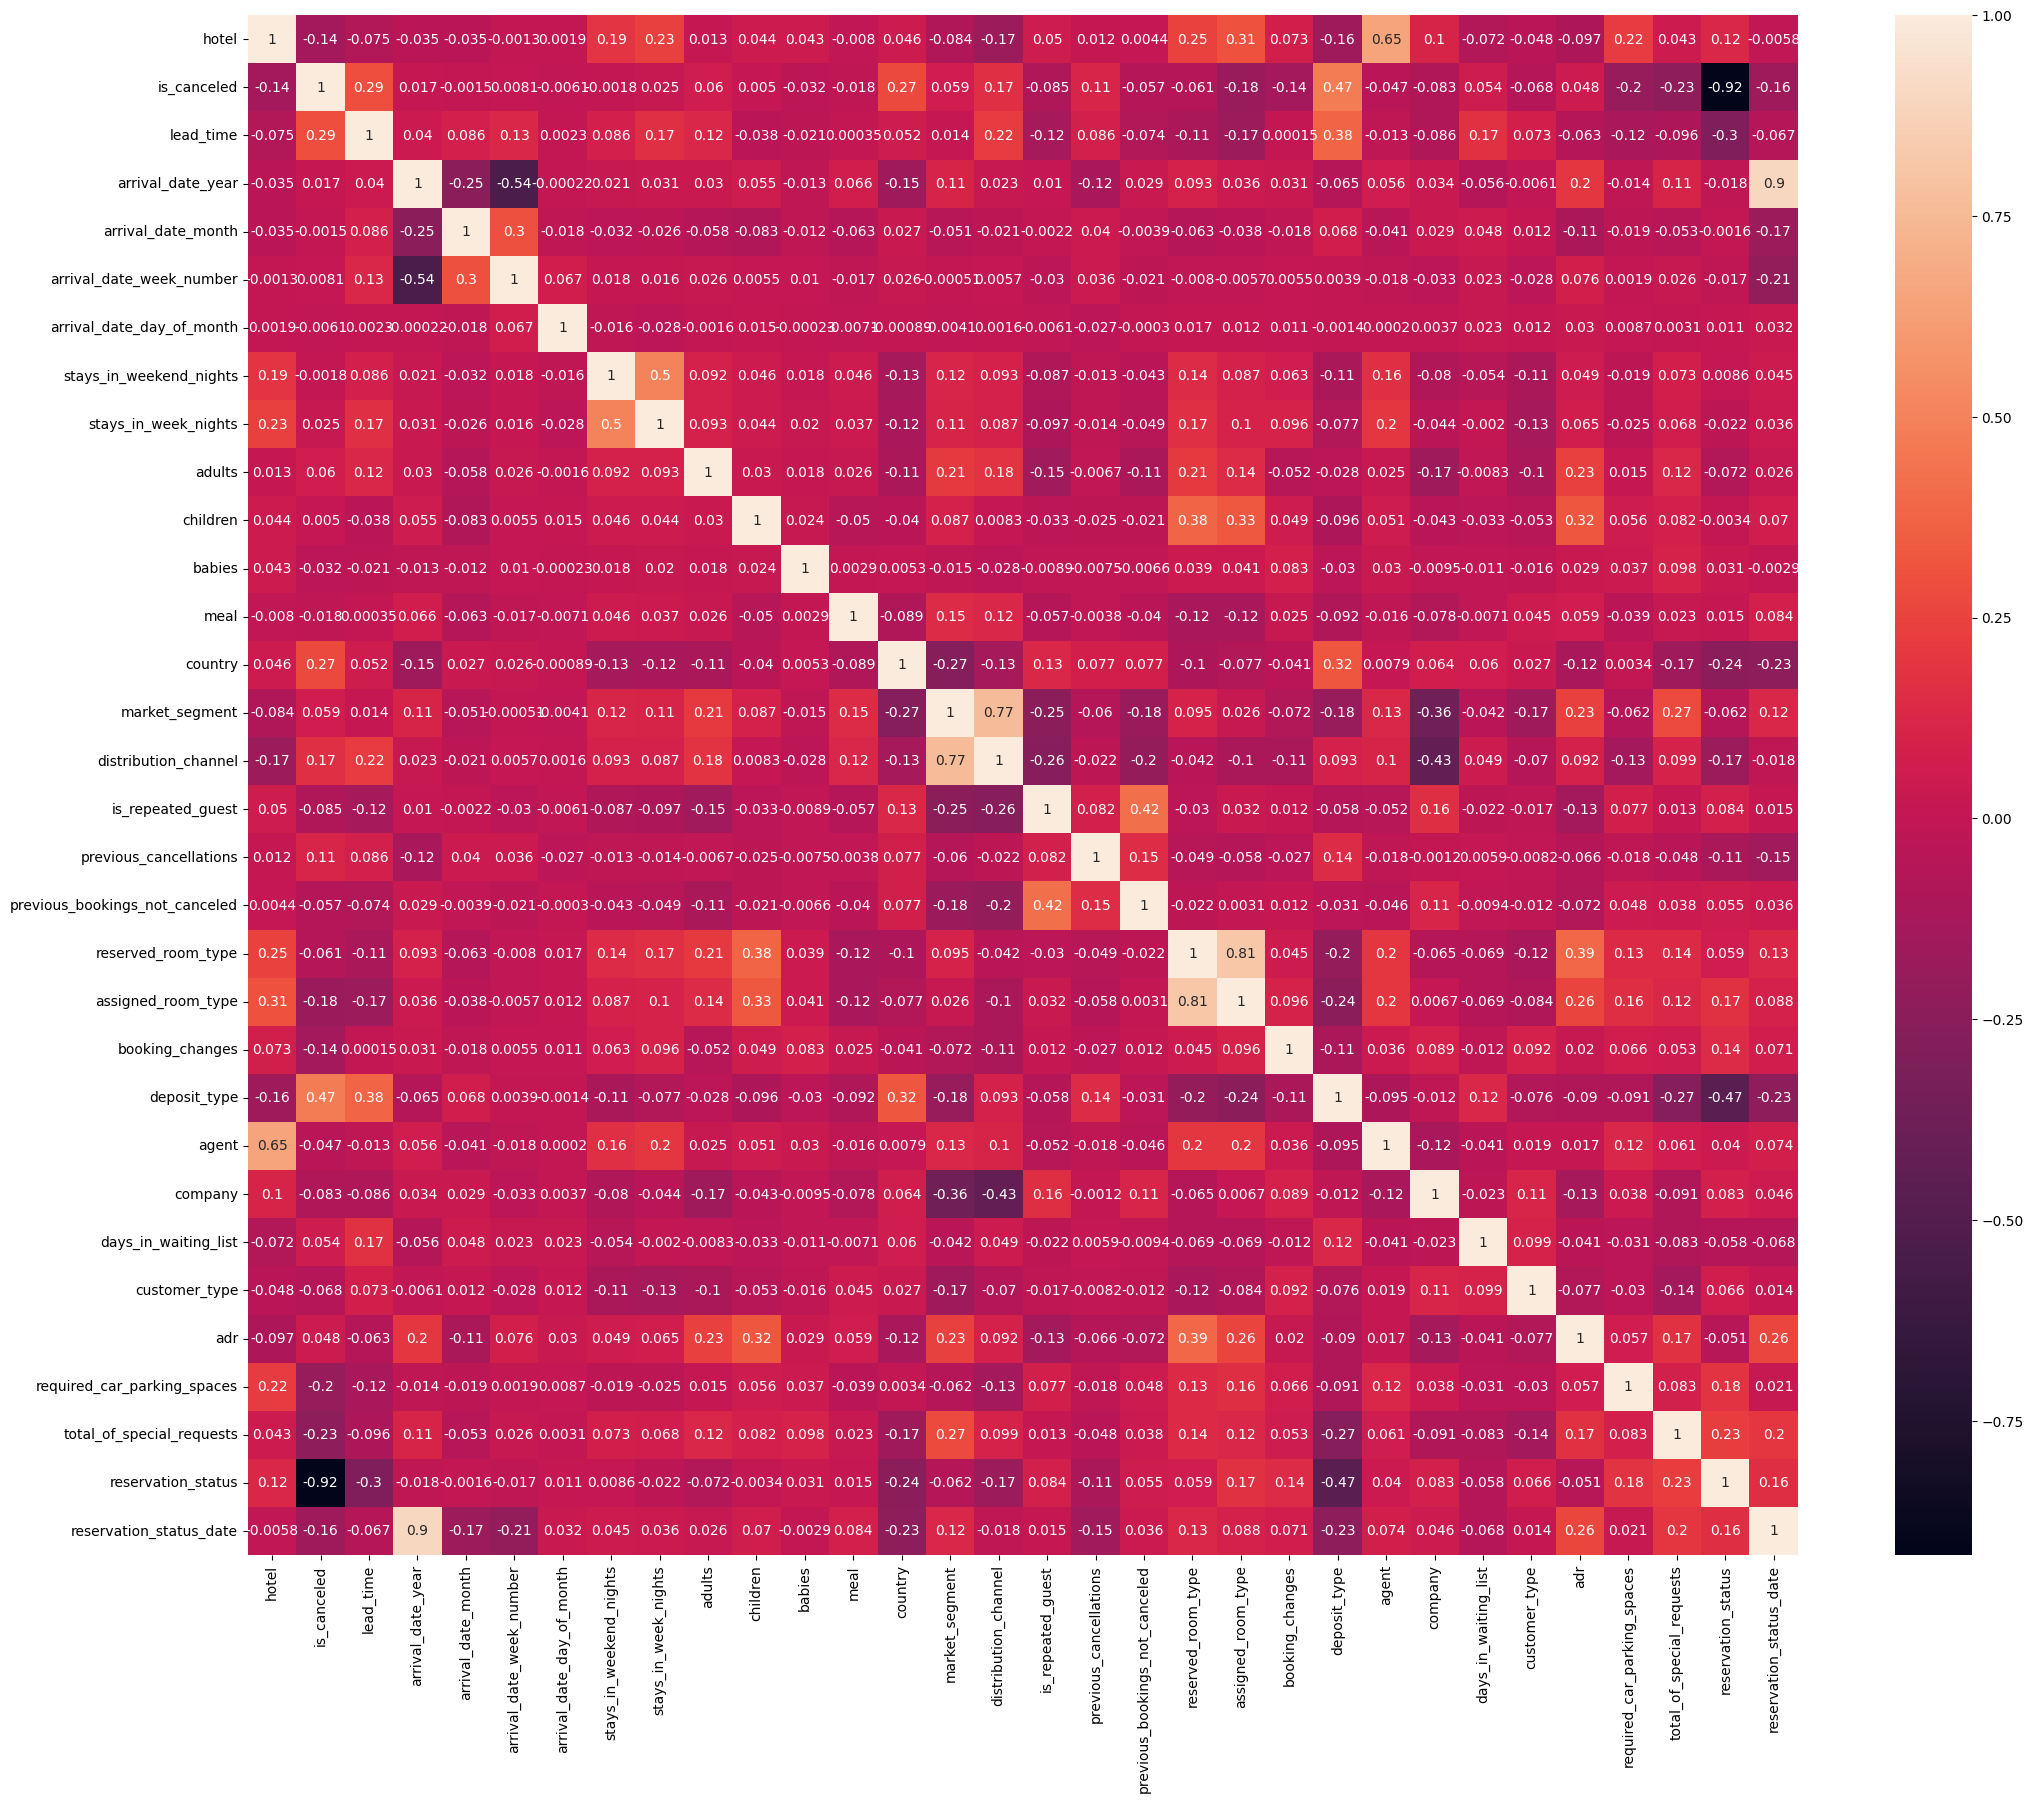

In [ ]:
numerical =df.select_dtypes(include =['number' ,'bool'])
corr =numerical.corr()
plt.figure(figsize=(25 ,20))
sns.heatmap(corr ,annot= True)

In [ ]:
df.drop('reservation_status' ,axis =1 ,inplace =True)
df.drop('reservation_status_date' ,axis =1 ,inplace =True)


# Feature Enginnering

In [ ]:
df['total_guests']=df['adults'] + df['children']+ df['babies']
df['total_stay'] =df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
0,1.407224,-0.76704,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,-0.094341,-2.239130
1,1.407224,-0.76704,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,-0.094341,-2.239130
2,1.407224,-0.76704,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,-0.373175,-0.698406,-0.199748,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,-1.820685,-1.715098
3,1.407224,-0.76704,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,-0.373175,2.138963,-0.199748,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,-1.820685,-1.715098
4,1.407224,-0.76704,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,...,-0.373175,1.541622,-0.199748,-0.131924,-0.237979,-0.075810,-0.254873,0.540666,-0.094341,-1.191065


# Spliting The Data

In [ ]:
x_train ,x_test =train_test_split(df ,test_size =0.2 ,random_state =42)
y_train =x_train.pop('is_canceled')
y_test =x_test.pop('is_canceled')
print(x_train.shape ,x_test.shape)
print(y_train.shape ,y_test.shape)

(95512, 31) (23878, 31)
(95512,) (23878,)
